In [6]:
import pandas as pd 
sales = pd.read_csv('c:/data/convenience/origin/sales.csv', encoding='ANSI')
sales.columns

Index(['기준년코드', '기준분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명', '서비스업종코드',
       '서비스업종코드명', '점포별월매출금액', '당월매출금액', '점포별월건수', '당월매출건수', '주중매출비율',
       '주말매출비율', '월요일매출비율', '화요일매출비율', '수요일매출비율', '목요일매출비율', '금요일매출비율',
       '토요일매출비율', '일요일매출비율', '시간대00~06매출비율', '시간대06~11매출비율', '시간대11~14매출비율',
       '시간대14~17매출비율', '시간대17~21매출비율', '시간대21~24매출비율', '남성매출비율', '여성매출비율',
       '연령대10매출비율', '연령대20매출비율', '연령대30매출비율', '연령대40매출비율', '연령대50매출비율',
       '연령대60이상매출비율', '주중매출금액', '주말매출금액', '월요일매출금액', '화요일매출금액', '수요일매출금액',
       '목요일매출금액', '금요일매출금액', '토요일매출금액', '일요일매출금액', '시간대00~06매출금액',
       '시간대06~11매출금액', '시간대11~14매출금액', '시간대14~17매출금액', '시간대17~21매출금액',
       '시간대21~24매출금액', '남성매출금액', '여성매출금액', '연령대10매출금액', '연령대20매출금액',
       '연령대30매출금액', '연령대40매출금액', '연령대50매출금액', '연령대60이상매출금액', '주중매출건수',
       '주말매출건수', '월요일매출건수', '화요일매출건수', '수요일매출건수', '목요일매출건수', '금요일매출건수',
       '토요일매출건수', '일요일매출건수', '시간대건수~06매출건수', '시간대건수~11매출건수', '시간대건수~14매출건수',
       '시간대건수~17매출건수', '시간대건수~21매출건수', '시간대건수~24매출건수', '

In [7]:
sales = sales[['상권코드', '당월매출금액']]
sales = sales.groupby(by=['상권코드']).mean()
sales

,당월매출금액
상권코드,
1000001,6.826894e+08
1000002,7.691613e+08
1000003,9.483103e+08
1000004,1.071043e+09
1000005,1.252463e+08
...,...
1001492,1.914938e+10
1001493,8.185320e+09
1001494,6.483749e+09


In [8]:
gu = pd.read_csv('c:/data/convenience/origin/code.csv', encoding='ms949')
gu = gu[['시군구명', '상권코드']].set_index('상권코드')
gu

,시군구명
상권코드,
1000001,종로구
1000002,종로구
1000003,종로구
1000004,종로구
1000005,종로구
...,...
1001492,중구
1001493,중구
1001494,종로구


In [9]:
#구이름, 월매출금액 join
gu_sale = pd.merge(sales, gu, how='inner', on='상권코드').set_index('시군구명')
gu_sale = gu_sale.groupby(by=['시군구명']).mean()
gu_sale

,당월매출금액
시군구명,
강남구,1.479953e+09
강동구,6.906099e+08
강북구,5.134839e+08
강서구,6.711253e+08
관악구,7.656268e+08
광진구,7.932065e+08
구로구,8.035390e+08
금천구,1.025518e+09
노원구,9.932676e+08


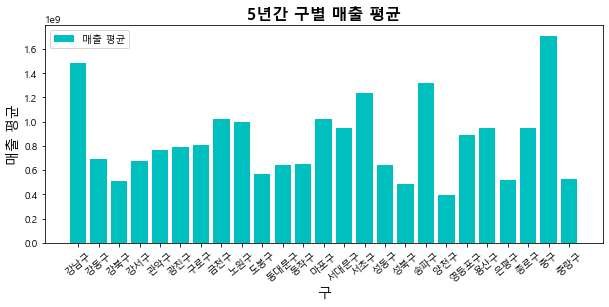

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(10, 4))
plt.bar(gu_sale.index, gu_sale['당월매출금액'], color='c')
plt.title("5년간 구별 매출 평균", size=16, weight="bold")
plt.xlabel('구', fontsize=14)
plt.ylabel('매출 평균', size=14)
plt.xticks(rotation=40)
plt.legend(['매출 평균'])
plt.show()